

### In this project, the dataset named Telco Customer Churn from Kaggle was used. Each row represents a customer, each column contains the customer’s attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service.

### Analysis of data columns to identify independent and dependent variables:

### X is the independent variables — the variables we are using to make predictions

- customerID — unique value identifying customer
- gender — whether the customer is a male or a female
- SeniorCitizen — whether the customer is a senior citizen or not (1, 0)
- Partner — whether the customer has a partner or not (Yes, No)
- Dependents — whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
- tenure — number of months the customer has stayed with the company
- PhoneService — whether the customer has a phone service or not (Yes, No)
- MultipleLines — whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService — customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity — whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup — whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection — whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport — whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV — whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies — whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract — type of contract according to duration (Month-to-month, One year, Two year)
- PaperlessBilling — bills issued in paperless form (Yes, No)
- PaymentMethod — payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
- MonthlyCharges — amount of charge for service on monthly bases
- TotalCharges — cumulative charges for service during subscription (tenure) period

### y is dependent variable — variable we are trying to predict or estimate
### Churn — output value, predict variable

### So, first of all we imported the required libraries needed 

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# classification report
from sklearn.metrics import classification_report

# Linear models
from sklearn.linear_model import LogisticRegression

# Splitting dataset
from sklearn.model_selection import train_test_split

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

### Next, after installing the  the required packages ,Data Reading. Let’s import the dataset.

- The first step of the analysis consists of reading and storing the data in a Pandas data frame using the pandas.read_csv function we loaded the dataframe, by reading the csv file provided 

In [2]:
df = pd.read_csv("telco_customer_churn.csv")

### After reading the csv as a df, we went ahead to check the first 5 rows  from the top . This returned teh first 5 rpws with the names of cthe columns in addition to the specified rows

In [3]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


### Next, we checked the shape of our dataframe uisng .shape

In [4]:
print("Shape: ", df.shape)

Shape:  (7043, 21)


In [23]:
print(df["SeniorCitizen"].unique())

[0.]


- We found out that the shape of our dataframe is (7043, 21), this means that the datafrem has 7043 rows and 21 columns

### Show All of The Columns

In [6]:
display(df.columns.values)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- So, here we can see all of the columns name and immediately we can see some interesting columns like customer Id, gender, phone service, internet service, contract, monthly charges, tenure and obviously churn

### Next we checked for the info for our df so as we can get a coincise summary of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- After checking the info of our dataframe, we have 7043 entries and 21 columns. Also, df.info() gave us the nammes of our columns that we have in the df and the data types of each columns. Also,  the number of non null values wa disp;ayed for eah column as shown.
- So our datfarme has three datatypes( floats for 1 column which si monthly charges, int 64 for two columns which include seniour citizena  and tenure and the  other 18 columns are have object datatype)

### Next step  involved checking for the decription of our data in the df using decribe()

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



From the summmary we can see that teh decribe function did apply on the  four columns since they  are numerical.
- The dataset consists of 7043 entries. Regarding the 'SeniorCitizen' column, it indicates whether a customer is a senior citizen, with a mean value of approximately 0.16 and a standard deviation of about 0.37. This suggests that senior citizens make up a relatively small portion of the customer base, with a maximum value of 1 indicating that some customers are indeed senior citizens.

- Moving to the 'tenure' column, which represents the number of months a customer has stayed with the service, the mean tenure is approximately 32.37 months, with a standard deviation of around 24.56. This indicates a wide range of tenures among customers, ranging from 0 months to a maximum of 72 months, with a median (50th percentile) tenure of 29 months.

- Regarding 'MonthlyCharges', which denotes the monthly service charges for customers, the mean monthly charge is approximately $64.76, with a standard deviation of about $30.09. The charges vary considerably among customers, with a minimum of $18.25 and a maximum of $118.75. The median monthly charge is $70.35, indicating that half of the customers pay more than this amount monthly.

- 'TotalCharges' represents the total charges incurred by each customer. The mean total charge is approximately $2283.30, with a standard deviation of around $2265.00. The total charges range from $18.80 to $8684.80, with a median total charge of $1400.55. This suggests significant variability in the total charges incurred by customers, with some customers having substantially higher charges than others.


### Next we checked for any npn null values in the dataframe 

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- After running the cell we can see the columns name in the left and number for missing values for each column on the right and right every single value is zero so this tells us that this data has no missing values.

### Next we checked to see if we have any duplicated values in out dataframe

In [10]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df = df.drop_duplicates()

### Checking Outliers in Numerical Columns

In [12]:
num_cols = df.select_dtypes(include = ["int", "float"])
print(num_cols.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


### Visualizing outliers in Numerical columns

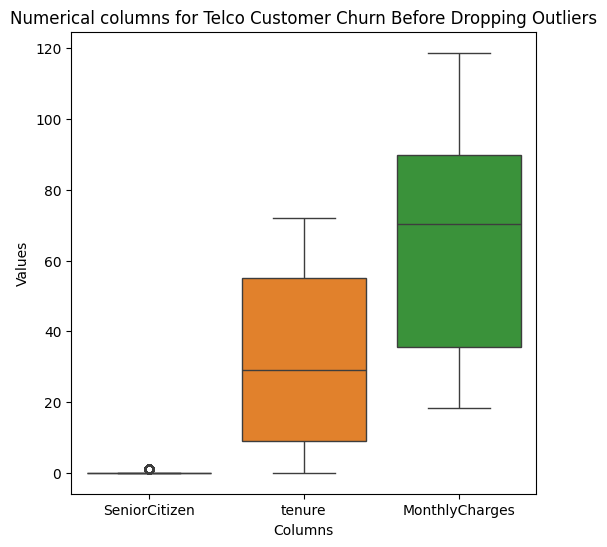

In [13]:
plt.figure(figsize=(6, 6))
sns.boxplot(num_cols)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Telco Customer Churn Before Dropping Outliers")
plt.show()

In [14]:
def remove_outliers(col_data):
    '''
        remove_outliers - removes the outliers that are present above the third quartile and below the
                    first quartile.
        Args:
            1. col_data: The columns data.
        Return:
            Returns the new column data after the outliers have been filtered out.
    '''

    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1

    upper_qt = Q3 + 1.5 * IQR
    lower_qt = Q1 - 1.5 * IQR

    # Filter data to exclude outliers
    no_outliers = col_data[(col_data >= lower_qt) & (col_data <= upper_qt)]
    
    return no_outliers

In [15]:
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

In [16]:
new_df = pd.DataFrame()

# Loop through all columns in agric_df
for column in df.columns:
    if is_numeric(df[column]):
        # Numeric columns: Compute quartiles and add to new_df
        new_df[column] = remove_outliers(df[column])
    else:
        # Categorical columns: Directly copy to new_df
        new_df[column] = df[column]

# Now new_df contains both numeric and categorical columns
print(new_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            0.0     Yes         No       1           No   
1  5575-GNVDE    Male            0.0      No         No      34          Yes   
2  3668-QPYBK    Male            0.0      No         No       2          Yes   
3  7795-CFOCW    Male            0.0      No         No      45           No   
4  9237-HQITU  Female            0.0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
# Checking the Shape of the datframe after droping outliers
print("Shape: ", new_df.shape)

Shape:  (7043, 21)


In [18]:
# Checking for null or NaN values in the dataframe
new_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [19]:
# Dropping all the NaN values and storing the new dataframe in "df"
df = new_df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# Checking the shape of the dataframe after dropping NaN values
print("Shape: ", df.shape)

Shape:  (5901, 21)


### Visualizing the Numerical columns after removing outliers

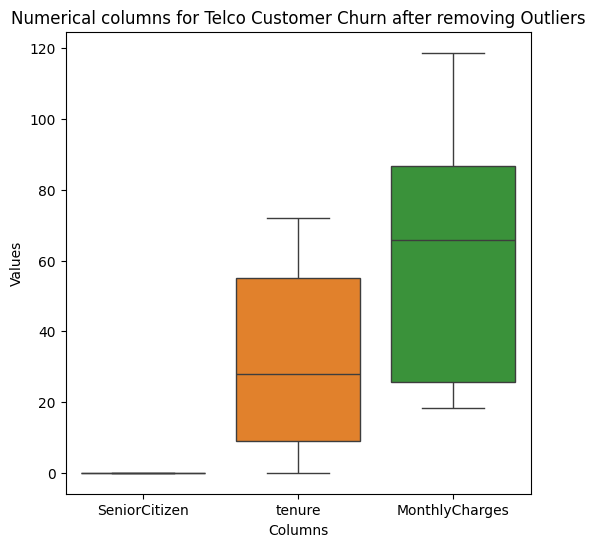

In [21]:
# Visualising the shape of the numerical columns after dropping outliers
plt.figure(figsize=(6, 6))
sns.boxplot(df)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Telco Customer Churn after removing Outliers")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   float64
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 
 17  